In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import rdkit
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw

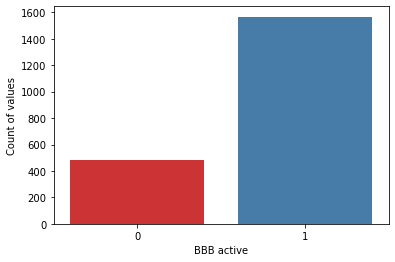

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


In [41]:
data  = pd.read_csv('BBBP.csv')
sns.countplot(data=data, x='p_np', orient='v', palette='Set1')
plt.xlabel('BBB active')
plt.ylabel('Count of values')
plt.show()
data

In [47]:
data['mol'] = data['smiles'].apply(lambda x: rdkit.Chem.MolFromSmiles(x))
print("data:", data.shape)
data = data.dropna(axis=0) #删除任何包含NaN值的行（即SMILES转换失败的行）
print("data:", data.shape)
data

[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not removing hydrogen atom without neighbors
[15:47:50] WARNING: not r

data: (2039, 5)
data: (2039, 5)


,num,name,p_np,smiles,mol
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x000001C6778...
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,<rdkit.Chem.rdchem.Mol object at 0x000001C6778...
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,<rdkit.Chem.rdchem.Mol object at 0x000001C6778...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x000001C6778...
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,<rdkit.Chem.rdchem.Mol object at 0x000001C6778...
...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,<rdkit.Chem.rdchem.Mol object at 0x000001C6761...
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,<rdkit.Chem.rdchem.Mol object at 0x000001C6761...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,<rdkit.Chem.rdchem.Mol object at 0x000001C6761...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,<rdkit.Chem.rdchem.Mol object at 0x000001C6761...


In [68]:
# ------------------------------------计算分子描述特征------------------------------------
data['tspa'] = data['mol'].apply(lambda x: Descriptors.TPSA(x)) #分子拓扑极性表面积
data['mol_w'] = data['mol'].apply(lambda x: Descriptors.MolWt(x)) #计算分子量
data['num_valence_electrons'] = data['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x)) #计算分子价电子数
data['num_heteroatoms'] = data['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x)) #计算分子杂原子数
data

,num,name,p_np,smiles,mol,tspa,mol_w,num_valence_electrons,num_heteroatoms
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x000001C6778...,41.49,294.802,109,4
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,<rdkit.Chem.rdchem.Mol object at 0x000001C6778...,29.54,360.325,130,5
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,<rdkit.Chem.rdchem.Mol object at 0x000001C6778...,75.01,361.373,138,8
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x000001C6778...,41.57,290.407,116,4
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,<rdkit.Chem.rdchem.Mol object at 0x000001C6778...,112.74,435.889,152,10
...,...,...,...,...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,<rdkit.Chem.rdchem.Mol object at 0x000001C6761...,108.86,276.035,88,9
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,<rdkit.Chem.rdchem.Mol object at 0x000001C6761...,185.46,398.445,148,12
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,<rdkit.Chem.rdchem.Mol object at 0x000001C6761...,72.32,322.368,122,6
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,<rdkit.Chem.rdchem.Mol object at 0x000001C6761...,64.60,382.460,148,6


In [71]:
# ------------------------------------划分数据集------------------------------------
from sklearn.model_selection import train_test_split
y = data.p_np.values
X = data.drop(columns=['smiles', 'name', 'p_np', 'mol'])
print(X)
# 设置20%的测试集，剩余80%作为训练集，random_state 值设为常用的42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X = X.reset_index(drop=True)

       num    tspa    mol_w  num_valence_electrons  num_heteroatoms
0        1   41.49  294.802                    109                4
1        2   29.54  360.325                    130                5
2        3   75.01  361.373                    138                8
3        4   41.57  290.407                    116                4
4        5  112.74  435.889                    152               10
...    ...     ...      ...                    ...              ...
2045  2049  108.86  276.035                     88                9
2046  2050  185.46  398.445                    148               12
2047  2051   72.32  322.368                    122                6
2048  2052   64.60  382.460                    148                6
2049  2053  161.46  295.255                    112               10

[2039 rows x 5 columns]


In [62]:
# ------------------------------------定义绘图函数------------------------------------
from sklearn.metrics import auc, roc_curve
def evaluation_class(model, X_test, y_test):
    preds = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'g', label='AUC = %0.3f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    plt.show()
    print("ROC AUC score", round(roc_auc, 4))

In [61]:
# ------------------------------------逻辑回归------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)  # 对训练集进行标准化
X_test = Scaler.transform(X_test)  # 对测试集进行标准化

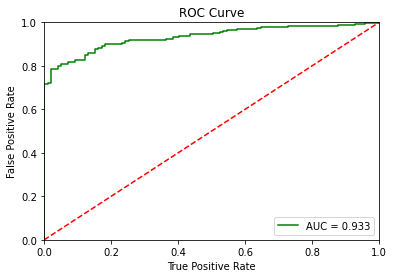

ROC AUC score 0.9327


In [30]:
lr = LogisticRegression(max_iter=10000)  # 构建逻辑回归模型
lr.fit(X_train, y_train)  # 用训练集数据训练模型
evaluation_class(lr, X_test, y_test)  # 调用评估函数利用测试集对模型进行测试

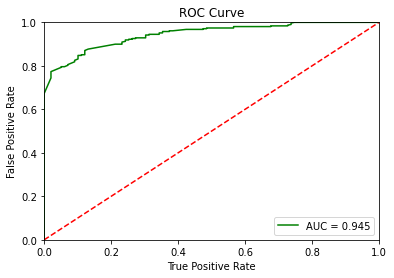

ROC AUC score 0.9446


In [31]:
# ------------------------------------随机森林模型------------------------------------
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
evaluation_class(rf, X_test, y_test)

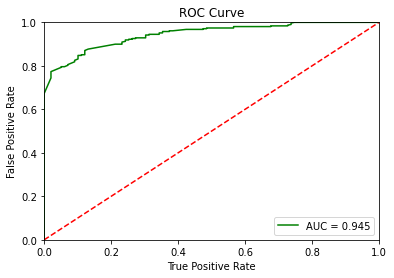

ROC AUC score 0.9446


In [35]:
# ------------------------------------支持向量机模型------------------------------------
svmc = svm.SVC(gamma = 'scale', C=1.0, decision_function_shape = 'ovr', kernel='rbf', probability=True)
svmc.fit(X_train, y_train)
evaluation_class(rf, X_test, y_test)